In [43]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
pio.templates.default = "plotly_white"

In [44]:
df = pd.read_csv("Instagram data.csv")

### Question 1

In [45]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


### Question 2

In [47]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


### Question 3

In [48]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

### Question 4

In [49]:
graph = px.histogram(df, x="Impressions", nbins=10, title = "Distributions of Impressions")
graph.show()

### Question 5

In [50]:
graph = px.line(df, y = "Impressions", title = "Impressions Over Time")
graph.show()

### Question 6

In [51]:
graph = px.line(df, y = ["Likes","Saves","Follows"], title = "Impressions Over Time")
graph.show()

### Question 7

In [52]:
new_df = df[["From Home", "From Hashtags", "From Explore", "From Other"]].sum()

graph = px.pie(new_df, labels = new_df.index, values = new_df.values,
               names = new_df.index, title = "Reach From Different Sources")

graph.show()

C:\Users\Ashhad\anaconda3\Lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



### Question 8

In [53]:
new_df = df[["Likes", "Saves", "Shares", "Comments"]].sum()

graph = px.pie(new_df, labels = new_df.index, values = new_df.values,
               names = new_df.index, title = "Engagement Sources")

graph.show()

C:\Users\Ashhad\anaconda3\Lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



### Question 9

In [54]:
graph = px.scatter(df, y = "Follows", x = "Profile Visits", trendline = "ols", title = "Profile Visits vs. Follows")
graph.show()

### Question 10


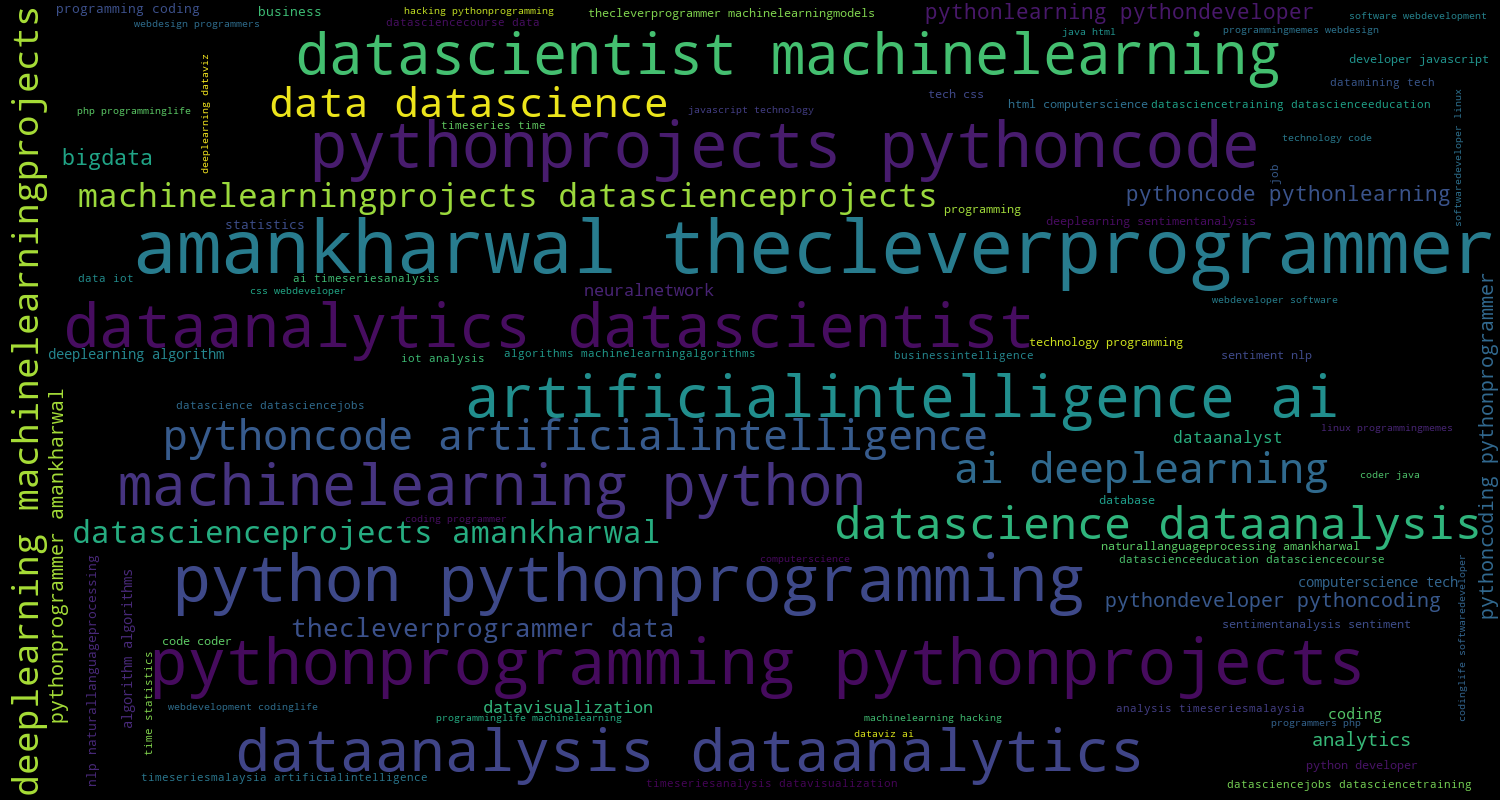

In [55]:
text = ' '.join(df['Hashtags'])
wordcloud = WordCloud(width = 1500, height = 800, 
                 background_color ='black', 
                stopwords = None, 
                min_font_size = 10).generate(text)

fig = px.imshow(wordcloud)
fig.update_layout(title_text='Hastag Word Clouds')
fig.show()

### Question 11

In [56]:
corr_matrix = df.corr()

heatmap = go.Heatmap(z=corr_matrix.values,
                     x=corr_matrix.columns,
                     y=corr_matrix.columns,
                     zmax = 1,
                     zmin = -1)
fig = go.Figure(data=[heatmap], layout=layout)
layout = go.Layout(title='Correlation Matrix')

fig.show()

C:\Users\Ashhad\AppData\Local\Temp\ipykernel_14672\3036942843.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Question 12

In [57]:
# Count the frequency of each hashtag
hashtags_counts = df['Hashtags'].str.split().explode().value_counts()

# Create a DataFrame from counts
df_hashtags = pd.DataFrame({'Hashtag': hashtags_counts.index, 'Frequency': hashtags_counts.values})

# Sort DataFrame by frequency in descending order
df_hashtags = df_hashtags.sort_values(by='Frequency', ascending=False)

# Create a bar graph using plotly.express
fig = px.bar(df_hashtags, x='Hashtag', y='Frequency', 
             title='Distribution of Hashtags', labels={'Frequency': 'Count'})

# Rotate x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

### Question 13

In [58]:
df2 = df.copy()

df2['Hashtags'] = df2['Hashtags'].str.split()
df_exploded = df2.explode('Hashtags')


df_likes_per_hashtag = df_exploded.groupby('Hashtags')['Likes'].sum().reset_index()

# Create a bar chart for likes vs hashtags
fig = px.bar(df_likes_per_hashtag, x='Hashtags', y='Likes',
             title='Likes Distribution for each Hashtags',
             labels={'Likes': 'Likes', 'Hashtags': 'Hashtag'})

fig.show()

In [59]:
df3 = df.copy()

df3['Hashtags'] = df3['Hashtags'].str.split()
df_exploded = df3.explode('Hashtags')


df_likes_per_hashtag = df_exploded.groupby('Hashtags')['Impressions'].sum().reset_index()


fig = px.bar(df_likes_per_hashtag, x='Hashtags', y='Impressions',
             title='Impressions Distribution for each Hashtag',
             labels={'Impressions': 'Impressions', 'Hashtags': 'Hashtag'})



fig.show()

### Question 14

In [60]:
"""
The impressions in each post are directly related to their likes, the number of shares they get and the number of visits.
Furthermore, there is a greater interest of the general userbase of Instagram towards the topics of Artificial Intelligence,
machine learning and AI in general.
"""

'\nThe impressions in each post are directly related to their likes, the number of shares they get and the number of visits.\nFurthermore, there is a greater interest of the general userbase of Instagram towards the topics of Artificial Intelligence,\nmachine learning and AI in general.\n'